In [1]:
from keras.models import load_model

m_1=load_model('models/local_upsampling_cnn.hdf5')
m_2=load_model('models/upsampling_cnn.hdf5')

Using TensorFlow backend.


In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [32]:
image = cv2.imread('data/bdd100k/stationary/images/train/0027eed2-815a0001.jpg')
label = np.load('data/bdd100k/stationary/labels/train/0027eed2-815a0001_train.npy')

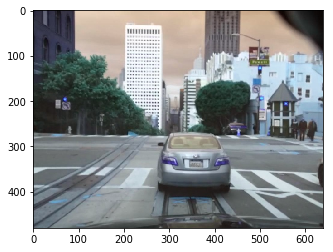

In [33]:
plt.imshow(image)

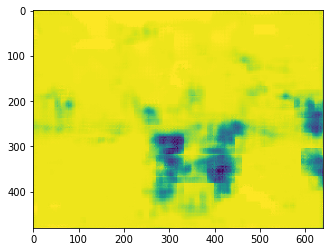

In [36]:
l = m_1.predict(np.array([image]))
plt.imshow(l[0])

In [28]:
l = m_2.predict(np.array([image]))
plt.imshow(l[0])

NameError: name 'image' is not defined

(array([  923.,   846.,   890.,   834.,  1002.,  1177.,  1091.,  1988.,
         4967., 63082.]),
 array([0.        , 0.09995935, 0.1999187 , 0.29987806, 0.3998374 ,
        0.49979675, 0.5997561 , 0.69971544, 0.7996748 , 0.8996341 ,
        0.9995935 ], dtype=float32),
 <a list of 10 Patch objects>)

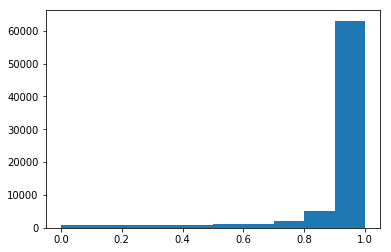

In [45]:
plt.hist(l[0].flatten())

In [3]:
m_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 480, 640, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 480, 640, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 240, 320, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 240, 320, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 240, 320, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 120, 160, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 160, 128)     73856     
__________

In [10]:
locally_connected = m_1.layers[10]

In [13]:
local_weights = locally_connected.weights[0]


In [16]:
import tensorflow as tf

v = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    v = sess.run(local_weights)

In [23]:
v = v.reshape(30,40, 128, 128)

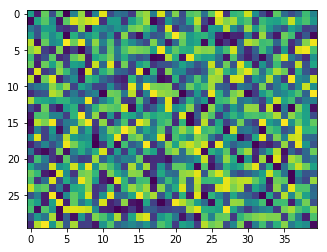

In [27]:
plt.imshow(v[:, :, 1, 1].reshape(30,40))